In [31]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np
from math import sqrt

In [2]:
def NOT(input):

    q = QuantumRegister(1) # a qubit in which to encode and manipulate the input
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if input=='1':
        qc.x( q[0] )
        
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x( q[0] )
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure( q[0], c[0] )
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1)
    output = next(iter(job.result().get_counts()))
    
    return output

In [3]:
print('\nResults for the NOT gate')
for input in ['0','1']:
    print('    Input',input,'gives output',NOT(input))


Results for the NOT gate
    Input 0 gives output 1
    Input 1 gives output 0


In [4]:
def XOR(input1, input2):
    q = QuantumRegister(2) # two qubits in which to encode and manipulate the input
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    if input1 != input2:
        qc.x(q[0])

    # YOUR QUANTUM PROGRAM GOES HERE
    qc.cx(q[0], q[1])
    qc.measure(q[1], c[0])# YOU CAN CHANGE THIS IF YOU WANT TO 
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return output

In [5]:
print('\nResults for the XOR gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('Inputs', input1, input2, 'give output', XOR(input1,input2))


Results for the XOR gate
Inputs 0 0 give output 0
Inputs 0 1 give output 1
Inputs 1 0 give output 1
Inputs 1 1 give output 0


In [6]:
def AND(input1,input2):
    
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    if input1 == '1':
        qc.x(q[0])
    if input2 == '1':
        qc.x(q[1])
    qc.ccx(q[0], q[1], q[2])
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

In [7]:
print('\nResults for the AND gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',AND(input1,input2))


Results for the AND gate
    Inputs 0 0 give output 0
    Inputs 0 1 give output 0
    Inputs 1 0 give output 0
    Inputs 1 1 give output 1


In [8]:
def NAND(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    if input1 == '1':
        qc.x(q[0])
    if input2 == '1':
        qc.x(q[1])
    qc.ccx(q[0], q[1], q[2])
    qc.x(q[2])
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO

    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

In [9]:
print('\nResults for the NAND gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',NAND(input1,input2))


Results for the NAND gate
    Inputs 0 0 give output 1
    Inputs 0 1 give output 1
    Inputs 1 0 give output 1
    Inputs 1 1 give output 0


In [10]:
def OR(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    if input1 == '1':
        qc.x(q[0])
    if input2 == '1':
        qc.x(q[1])
    if not ((input1 == '1') & (input2 == '1')):
        qc.cx(q[0], q[1])
#     qc.measure(q[2],c[0]) # original
    qc.measure(q[1],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

In [11]:
print('\nResults for the OR gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',OR(input1,input2))


Results for the OR gate
    Inputs 0 0 give output 0
    Inputs 0 1 give output 1
    Inputs 1 0 give output 1
    Inputs 1 1 give output 1


In [12]:
def draw_and_run(input1, input2):
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    if input1 == '1':
        qc.x(q[0])
    if input2 == '1':
        qc.x(q[1])
    if not ((input1 == '1') & (input2 == '1')):
        qc.cx(q[0], q[1])
    qc.measure(q[1],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    print("output = ", output)
    return qc.draw(output='mpl')

output =  1


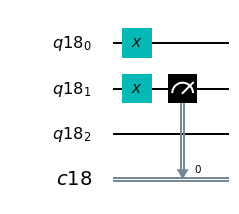

In [13]:
draw_and_run('1', '1')

n = 1
sqrt(1/error**2) =  1.9990007493755466
1/1**2 =  1.0
------------
n = 2
sqrt(1/error**2) =  2.964345833643761
1/2**2 =  0.25
------------
n = 3
sqrt(1/error**2) =  3.931405669853757
1/3**2 =  0.1111111111111111
------------
n = 4
sqrt(1/error**2) =  4.80847036834345
1/4**2 =  0.0625
------------
n = 5
sqrt(1/error**2) =  5.693409423095719
1/5**2 =  0.04
------------
n = 6
sqrt(1/error**2) =  6.160411036336974
1/6**2 =  0.027777777777777776
------------
n = 7
sqrt(1/error**2) =  6.780635036208104
1/7**2 =  0.02040816326530612
------------
n = 8
sqrt(1/error**2) =  7.124704998790965
1/8**2 =  0.015625
------------
n = 9
sqrt(1/error**2) =  7.53778361444409
1/9**2 =  0.012345679012345678
------------
n = 10
sqrt(1/error**2) =  8.09776330178916
1/10**2 =  0.01
------------


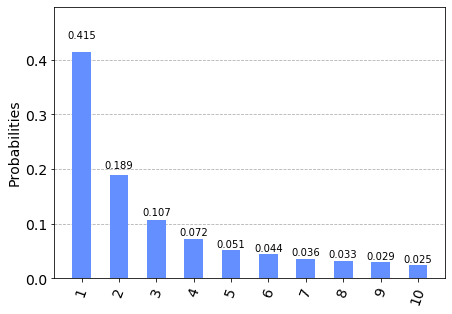

In [48]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

error = {}
for n in range(1,11):

    # Create a blank circuit
    qc = QuantumCircuit(q,c)
    
    # Implement an approximate Hadamard
    theta = 3.*np.pi/4. # here we incorrectly choose theta=pi
    for j in range(n):
        qc.rx(theta/n,q[0])
        qc.rz(theta/n,q[0])
      
    # We need to measure how good the above approximation is. Here's a simple way to do this.
    # Step 1: Use a real hadamard to cancel the above approximation.
    # For a good approximatuon, the qubit will return to state 0. For a bad one, it will end up as some superposition.
    qc.h(q[0])
    
    # Step 2: Run the circuit, and see how many times we get the outcome 1.
    # Since it should return 0 with certainty, the fraction of 1s is a measure of the error.
    qc.measure(q,c)
    shots = 20000
    job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
    try:
        error[n] = (job.result().get_counts()['1']/shots)
        print(f"n = {n}")
        print("sqrt(1/error**2) = ", sqrt(1./error[n]))
        print(f"1/{n}**2 = ", 1./n**2)
        print("------------")
    except:
        pass
        
plot_histogram(error)

sqrt(1/error**2) =  2.4091140546160488
sqrt(1/error**2) =  4.538427298976457
sqrt(1/error**2) =  1.0022072867228944
sqrt(1/error**2) =  1.41315409395441
sqrt(1/error**2) =  1.1470786693528088
sqrt(1/error**2) =  2.020511274244429
sqrt(1/error**2) =  1.6767104359008653
sqrt(1/error**2) =  1.4089399073526938
sqrt(1/error**2) =  1.2678559097708404
sqrt(1/error**2) =  1.230868286877575


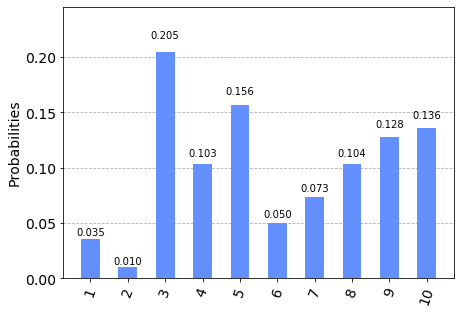

In [44]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

error = {}
for n in range(1,11):

    # Create a blank circuit
    qc = QuantumCircuit(q,c)
    
    # Implement an approximate Hadamard
    theta = 3*np.pi/4. # here we incorrectly choose theta=pi
    for j in range(n):
        qc.rz(theta/2*n,q[0])
        qc.rx(theta/n,q[0])
        qc.rz(theta/2*n,q[0])
      
    # We need to measure how good the above approximation is. Here's a simple way to do this.
    # Step 1: Use a real hadamard to cancel the above approximation.
    # For a good approximatuon, the qubit will return to state 0. For a bad one, it will end up as some superposition.
    qc.h(q[0])
    
    # Step 2: Run the circuit, and see how many times we get the outcome 1.
    # Since it should return 0 with certainty, the fraction of 1s is a measure of the error.
    qc.measure(q,c)
    shots = 20000
    job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
    try:
        error[n] = (job.result().get_counts()['1']/shots)
        print("sqrt(1/error**2) = ", sqrt(1./error[n]))
    except:
        pass
        
plot_histogram(error)